In [1]:
# Load in the data wrangling Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load data
#----------
bank = pd.read_csv('./../data/input/bank-additional-full.csv', sep=';')

# Explore the top of the dataset
#------------------------------
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check for null values and the datatypes
#----------------------------------------
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Double check for null values
#-----------------------------
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# How many rows and columns does the dataset have
#------------------------------------------------
bank.shape

(41188, 21)

In [6]:
# Quick statistical run down of the numerical columns
#----------------------------------------------------
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#  Replace columns names that have periods (.) with an underscore (_)
new_column_names = bank.columns

bank.columns = new_column_names.str.replace('.','_')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


More specifically, we'll look at the following topics.

Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

Model Building

Model training - create model(s) to learn to predict a target variable based on other variables.
Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
Model comparison - comparing several different models to find the best one.
Model fine-tuning - once we've found a good model, how can we improve it?
Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
Reporting what we've found - if we had to present our work, what would we show someone?

To work through our analysis, we'll use pandas, Matplotlib and NumPy for data anaylsis, then well use, Scikit-Learn for machine learning and modelling tasks.

## Distribution of the Target

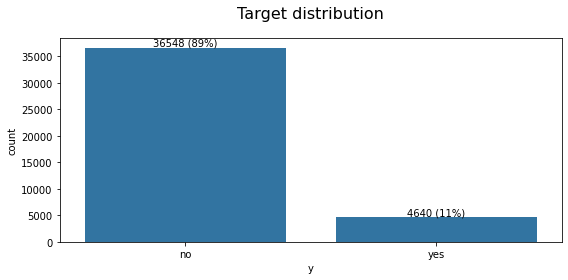

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=bank['y'], ax=ax)

abs_vals = bank['y'].value_counts()
rel_vals = bank['y'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.tight_layout();

There are more no's then yes's in this dataset, which is probably what is expected in the bank marketing subscriber environment. This is also the case of an imbalanced dataset and care must be taken into consideration when looking at accruacy, precision and recall.

## Conclusion:

Our target variable is highly imbalanced.

## Lets look at the age distribution of those that were subscribed the loan and those that were not.

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


"\nplt.figure(figsize = (10, 12))\nplt.style.use('default')\ng = sns.displot(data=bank, x='age', hue='y', bins=30, kde = False, legend=False)\n\nplt.title('Age Distribution')\nplt.xlabel('Age')\n\nplt.legend(title='Subscribed Term', loc='upper right', labels=['yes', 'no'])\nplt.show()\n"

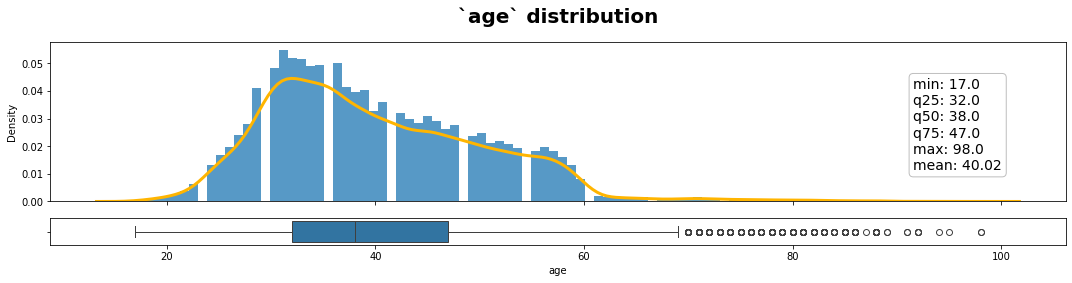

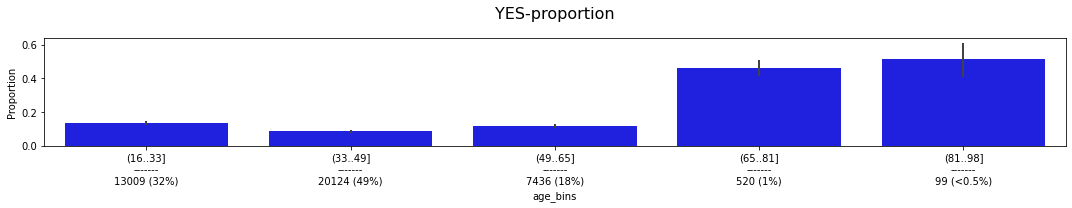

In [9]:
bank['y'].replace({'no': 0, 'yes': 1}, inplace=True);
%run custom_functions.ipynb
analyse_feature(df_=bank, feature_name='age', feature_type='numeric', num_gr=5)
'''
plt.figure(figsize = (10, 12))
plt.style.use('default')
g = sns.displot(data=bank, x='age', hue='y', bins=30, kde = False, legend=False)

plt.title('Age Distribution')
plt.xlabel('Age')

plt.legend(title='Subscribed Term', loc='upper right', labels=['yes', 'no'])
plt.show()
'''

In [10]:
feature_name = 'age'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (age vs y): 0.0304


# Feature: job (categorical)

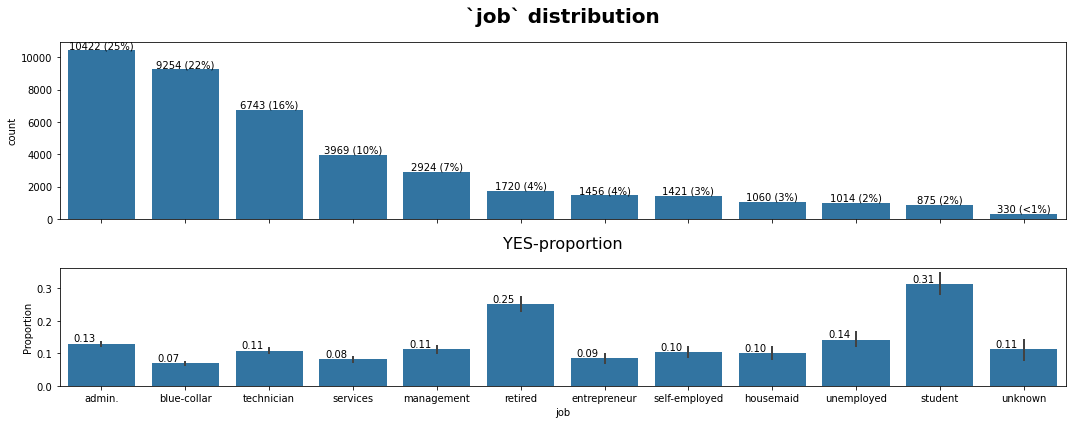

In [11]:
analyse_feature(df_=bank, feature_name='job', feature_type='categorical')


job

Conclusions:

Most of the people in the dataset are from working class (admin + blue-collar + technician + services  ≈
  73%).
There is no substantial evidence of relationships between job's categories and YES-answers.

# Feature: marital (categorical)

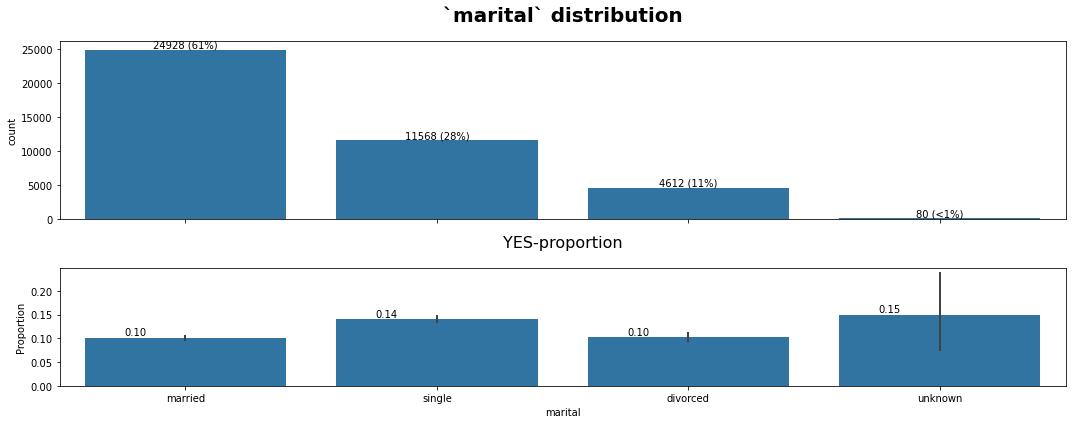

In [12]:
analyse_feature(df_=bank, feature_name='marital', feature_type='categorical')

marital

Conclusions:

Most people in the dataset are married ( ≈
 61%).
There is no substantial evidence of relationships between marital's categories and YES-answers.

# Feature: education (categorical)

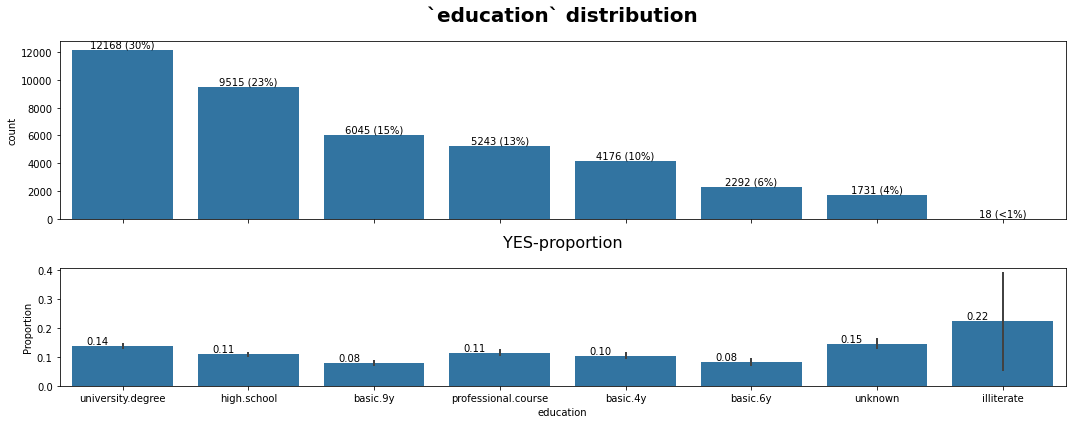

In [13]:
analyse_feature(df_=bank, feature_name='education', feature_type='categorical')

education

Conclusion:

There is no substantial evidence of relationships between education's categories and YES-answers.

# Feature: default (categorical)

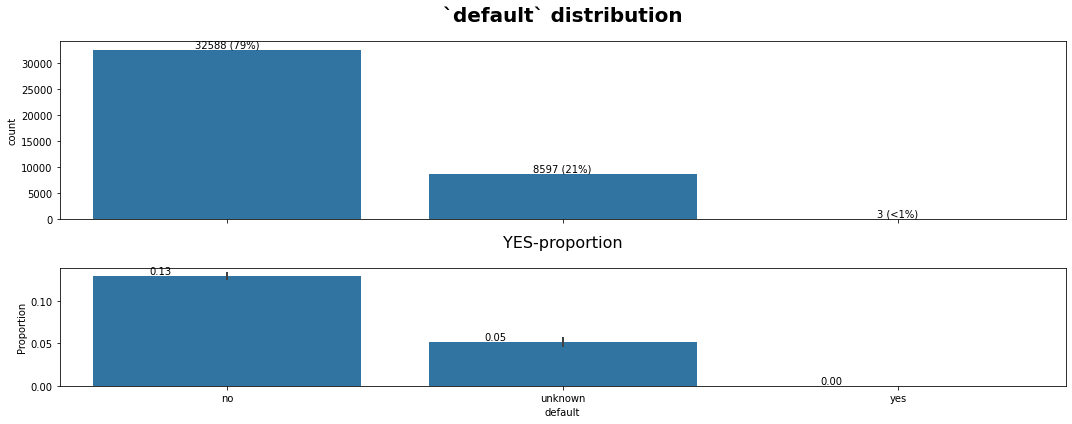

In [14]:
analyse_feature(df_=bank, feature_name='default', feature_type='categorical')

default

Conclusion:

Most people in the dataset ( ≈ 79%) have NO credit in default.
It seems like people with NO credit in default are more likely to agree to subscribe a bank term deposit

# Feature: housing (categorical)

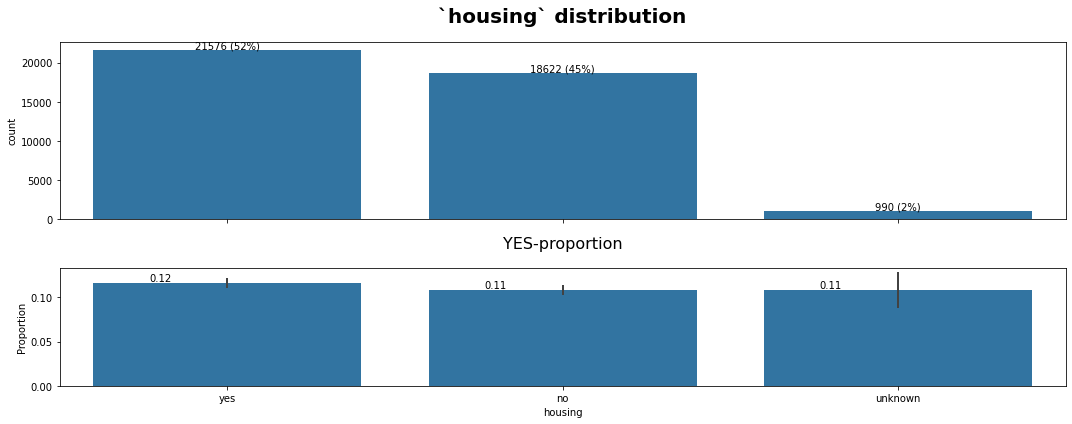

In [15]:
analyse_feature(df_=bank, feature_name='housing', feature_type='categorical')

housing

Conclusion:

The number of people who have a housing loan is almost equal to the number of people who haven't (52% vs 45%).
There is no substantial evidence of relationships between housing's categories and YES-answers.

# Feature: loan (categorical)

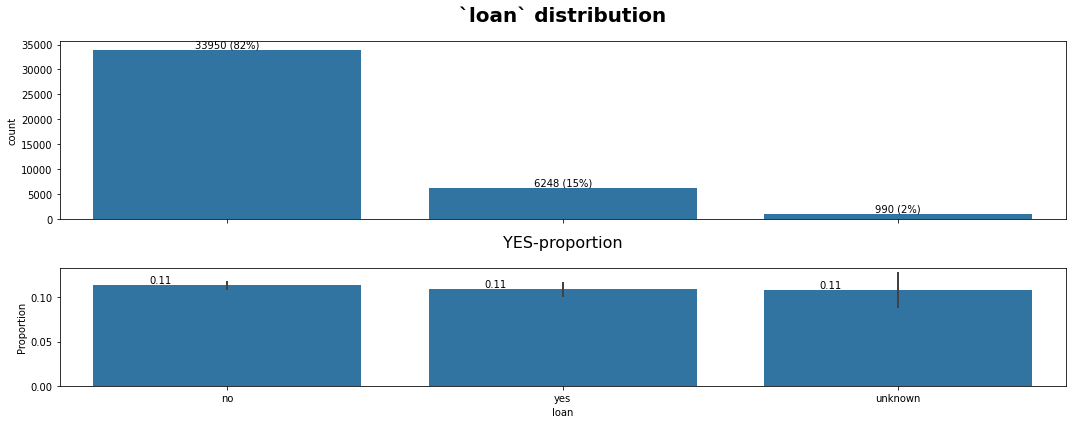

In [16]:
analyse_feature(df_=bank, feature_name='loan', feature_type='categorical')

loan

Conclusion:

The overwhelming majority of people don't have a personal loan ( ≈ 82%)
There is no substantial evidence of relationships between loan's categories and YES-answers.

# Feature: contact (categorical)
Related with the last contact of the current campaign

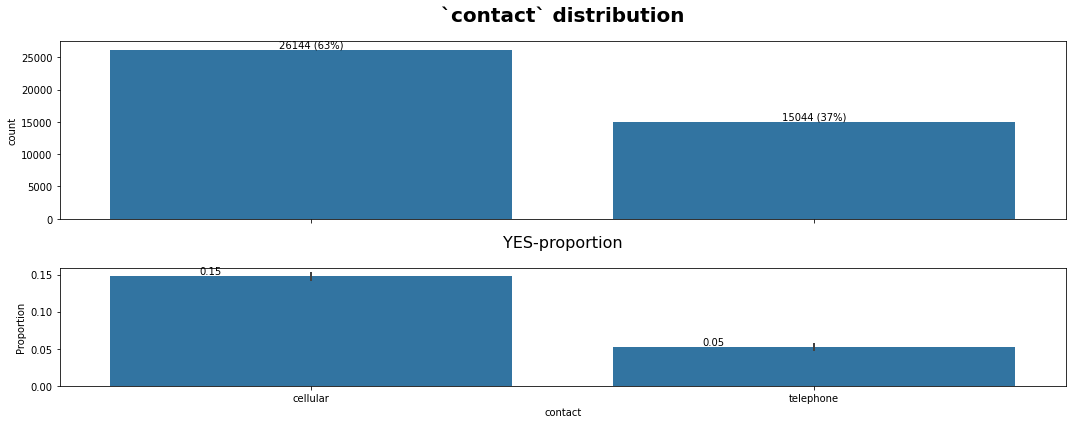

In [17]:
analyse_feature(df_=bank, feature_name='contact', feature_type='categorical')

contact

Conclusion:

Most people were contacted by the cellular ( ≈ 63%)
People which were contacted via cellular are a bit likely to agree to subscribe a bank term deposit.

# Feature: duration (numeric)
duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


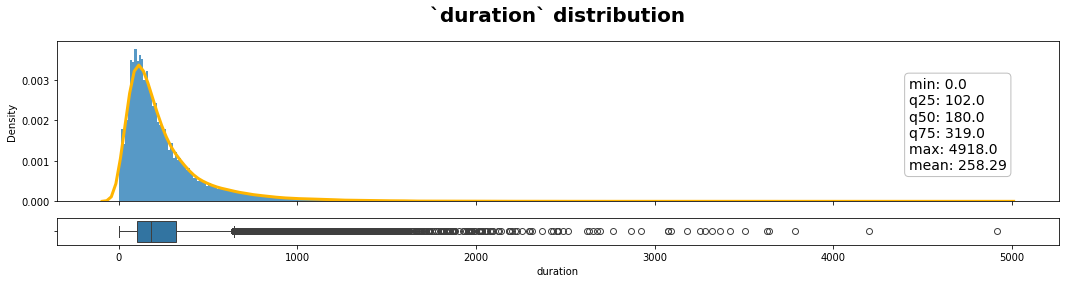

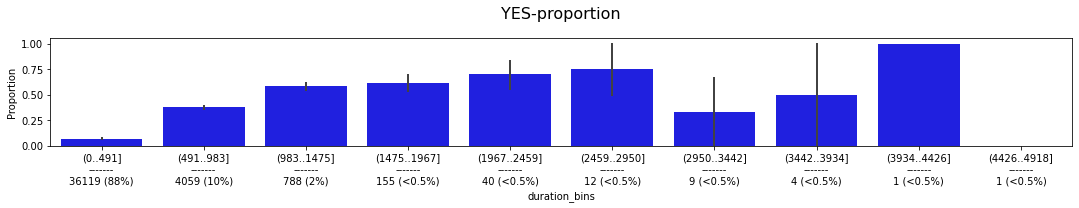

In [18]:
analyse_feature(df_=bank, feature_name='duration', feature_type='numeric')

In [19]:
feature_name = 'duration'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (duration vs y): 0.4053


There is a correlation between duration and y.

duration

Conclusion:

If we consider only first 3-4 groups (with enough number of observations), it's pretty obvious that the longer the call is the higher chances are to get a positive decision (and the common sense says the same).
And we also shouldn't forget about the important note, that says: "this attribute highly affects the output target (e.g., if duration=0 then y='no')".

# Feature: campaign (numeric)

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


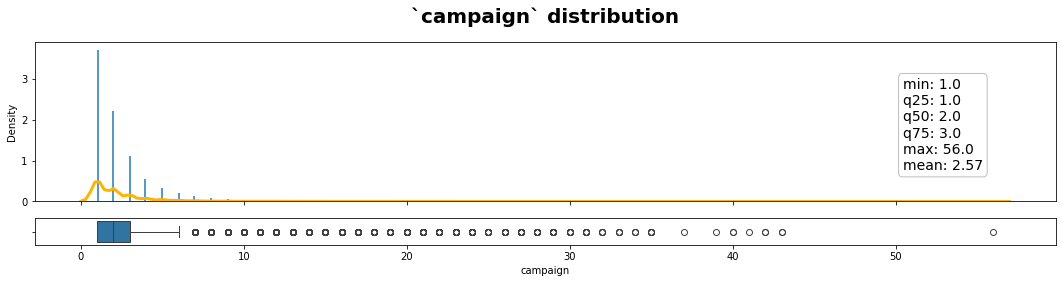

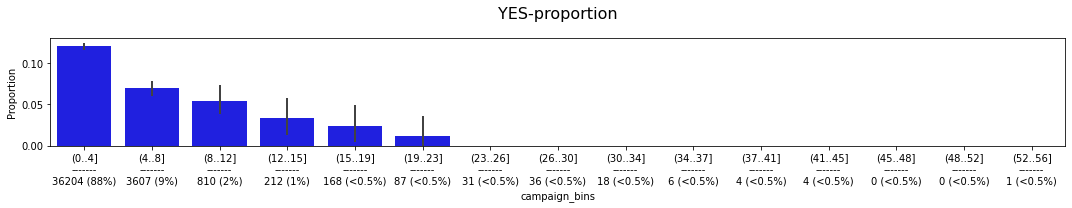

In [20]:
analyse_feature(df_=bank, feature_name='campaign', feature_type='numeric', num_gr=15)

In [21]:
feature_name = 'campaign'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (campaign vs y): -0.0664


There is no correlation between campaign and y.

campaign

Conclusion:

Nearly 43% were contacted only once.
88% of people were contacted less than 5 times.

# Feature: pdays (numeric)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


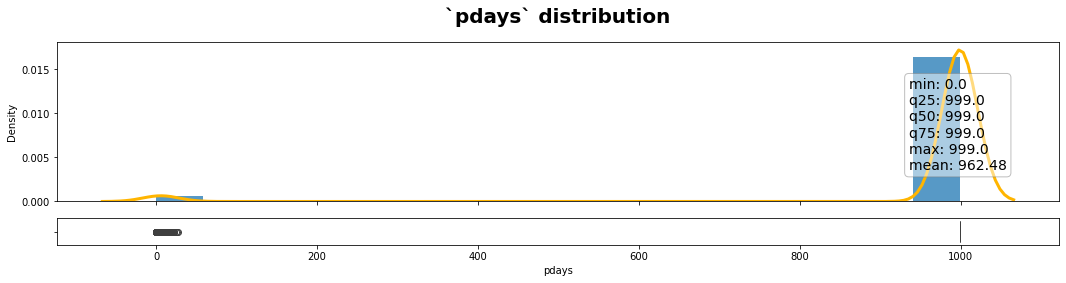

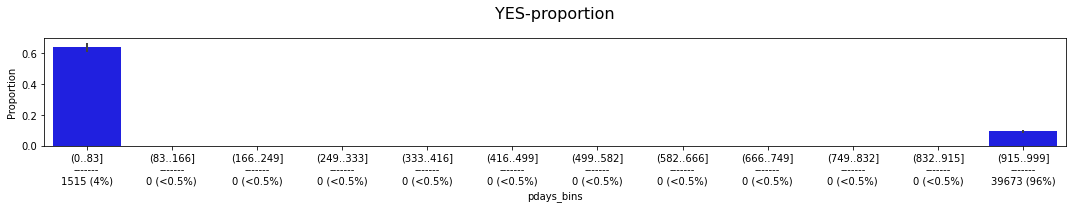

In [22]:
analyse_feature(df_=bank, feature_name='pdays', feature_type='numeric', num_gr=12)

Let's replace 999 with -1 and repeat the analysis:

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


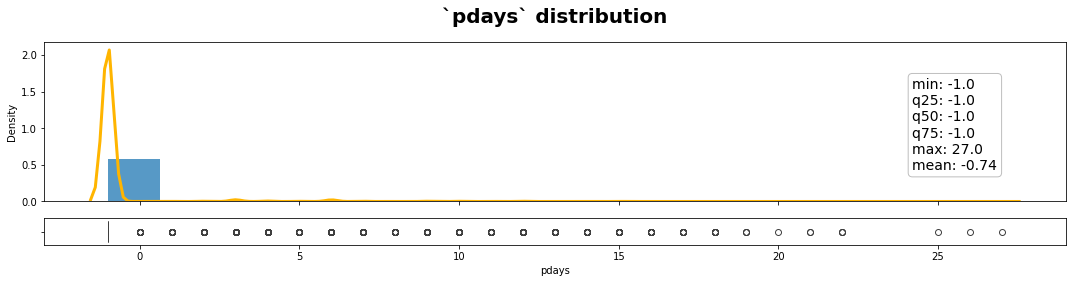

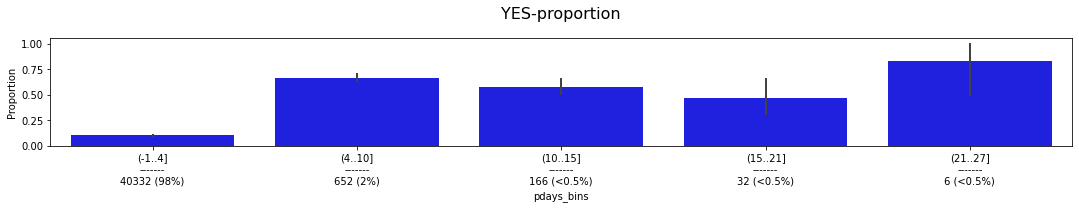

In [23]:
bank['pdays'] = bank['pdays'].replace({999: -1})
analyse_feature(bank, 'pdays', 'numeric', num_gr=5)

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


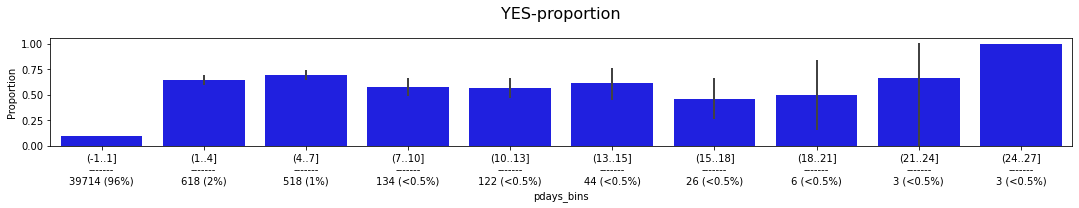

In [24]:
plot_yes_proportion(df_=bank, feature_name='pdays', feature_type='numeric')

In [25]:
feature_name = 'pdays'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (pdays vs y): 0.2790


There is a weak correlation between pdays and y
Conclusion:

Around 96% were not contacted from the last campaign.
The chances to get YES are pretty high within the first 2 weeks (up to 14-15 days); further we have high variance and small data.
People, who was not being previously contacted, have the lowest probability to say YES (0.09).

# Feature: previous (numeric)
previous: number of contacts performed before this campaign and for this client (numeric)


The number of groups CANNOT be more than number of unique values (8).
It will be automatically reduced to that number.


/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_3953/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


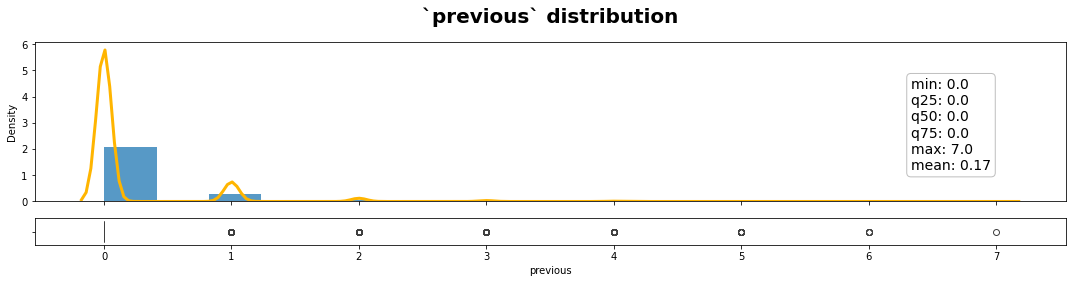

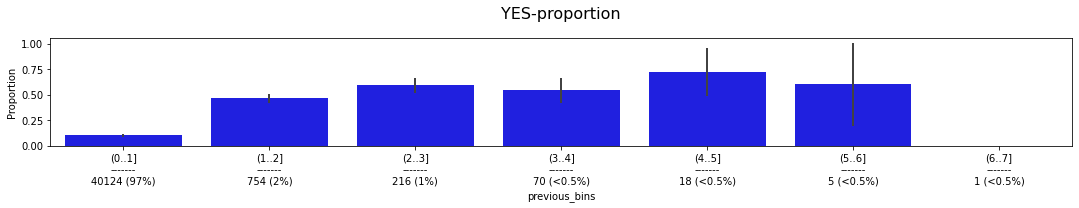

In [26]:
analyse_feature(df_=bank, feature_name='previous', feature_type='numeric', num_gr=10)

In [27]:
feature_name = 'previous'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (previous vs y): 0.2302


There is a weak correlation between previous and y.


previous

Conclusion:

Around 86% were not contacted before this campaign.
It seems like making contacts before a campaign is much better than do not do them at all (for numbers bigger than 3 we have a small number of observations).
Furthermore, we can suppose that more previous contacts mean more chances to get YES, but only to some degree.

# Feature: poutcome (categorical)
poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

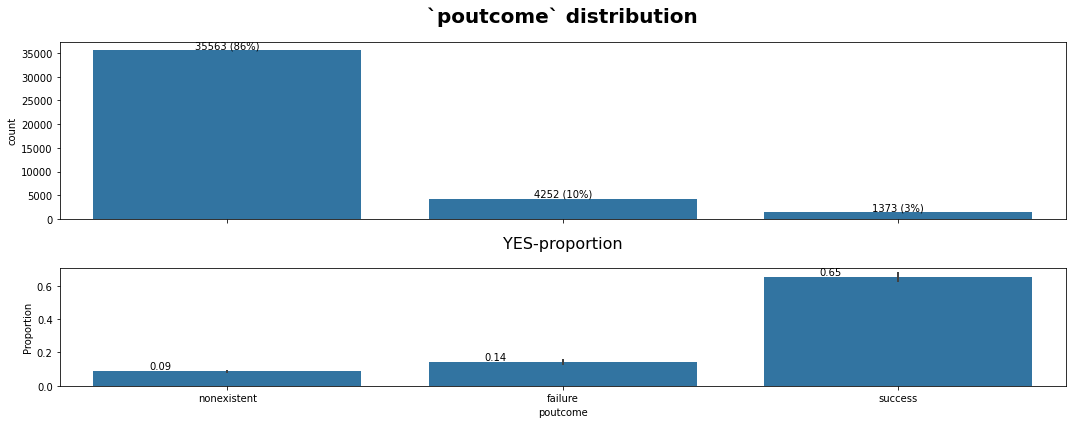

In [28]:
analyse_feature(df_=bank, feature_name='poutcome', feature_type='categorical')

In [29]:
print(f'"Success->success" clients: ~{0.65 * 1373 / bank.shape[0] * 100:.1f}%')
print(f'"Failure->success" clients: ~{0.14 * 4252 / bank.shape[0] * 100:.1f}%')

"Success->success" clients: ~2.2%
"Failure->success" clients: ~1.4%


poutcome

Conclusion:

86% did not participate in the previous marketing campaign, therefore we don't have any previous outcomes for them.
About 2.2% of clients answered YES during both previous and current campaigns.
About 1.4% of clients answered YES for the current campaign, while having NO with a previous one.
If we have a positive answer with a previous campaign, then we more likely to get YES answer during the current one.
If we have a negative answer with a previous campaign, then we less likely to get YES answer, and it is even lower probability for those whose results are non-existent.

# Social and economic context attributes

First, let's see how these features are connected with each other:


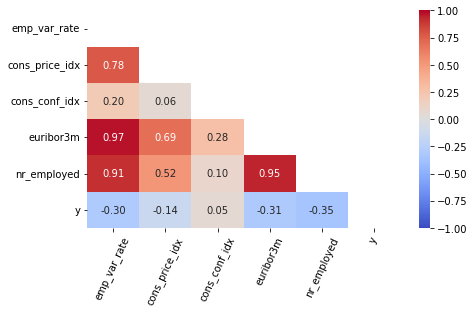

In [30]:
soc_econ_corr = bank[['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 
                'euribor3m', 'nr_employed', 'y']].corr()
mask = np.zeros_like(soc_econ_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(soc_econ_corr, vmin=-1, vmax=1, mask=mask, 
            annot=True, fmt='.2f', cmap=sns.color_palette('coolwarm', as_cmap=True), ax=ax);

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

Strong correlation:

    emp.var.rate and euribor3m (0.97)

    nr.employed and euribor3m (0.95)

    emp.var.rate and nr.employed (0.91)

    emp.var.rate and cons.price.idx (0.78)


Pretty high correlation:

    cons.price.idx and euribor3m (0.69)

    cons.price.idx and nr.employed (0.52)


# Feature: emp.var.rate (numeric)

emp.var.rate: employment variation rate - quarterly indicator (numeric)

Just for getting a general view of how emp.var.rate looks throughout all three years of observations:

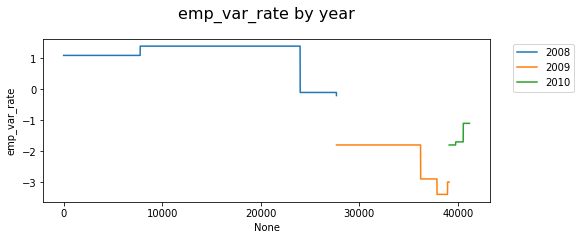

In [31]:
# Here we just get an insight of how months are going one by one in the dataset.
# Just a remainder: the observations are ordered by date (from May 2008 to November 2010)
months_arr = []
for i in range(bank.shape[0]):
    
    if months_arr != [] and months_arr[-1][1] == bank.iloc[i]['month']:
        continue
    else:
        months_arr.append([i, bank.iloc[i]['month']])

months_arr = np.array(months_arr)

bank['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

feature_name = 'emp_var_rate'

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=bank, x=bank.index, y=feature_name, hue='year', palette='tab10', ax=ax)

ax.set_title(f'{feature_name} by year', fontsize=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right');


2008: the rate was pretty stable and even a bit growing, except for the year ending (it dropped).
2009: stable for the most time, then decreased, and at the very end of 2009 it started to grow.
2010: the rate was growing up.

Now, let's see how YES-proportion correlates with emp.var.rate by month and year and throughout the entire dataset:


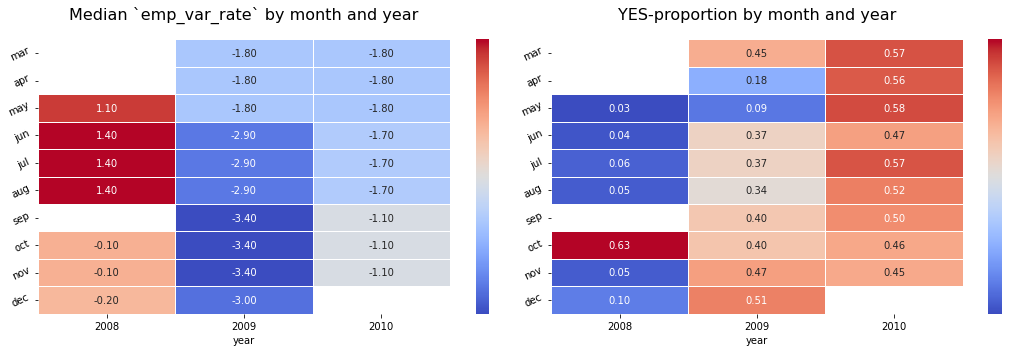

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_observations_by(by='month and year', df_=bank, feature_name=feature_name, fig=fig, ax=axes[0])
plot_yes_proportion_by(by='month and year', df_=bank, feature_name=feature_name, fig=fig, ax=axes[1])

plt.tight_layout()

In [33]:
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (emp_var_rate vs y): -0.2983


As you see, it is a light negative correlation. That means, the higher employment variation rate - the lower YES-proportion we got, and vice versa. And that seems quite reasonable: if the employment rate is highly various, people are not sure about their future and tend to make cautious decisions - so they give YES-answer less frequent. But we should be careful here and recall that correlation is not causation.

Let's check a distribution for YES/NO-answers:

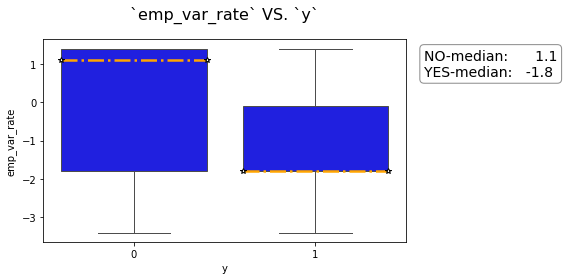

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=bank['y'], y=bank[feature_name], color='b',
            medianprops={'linestyle':'-.', 'linewidth':2.5, 'color':'orange',
                         'marker':'*', 'markerfacecolor':'white', 'markeredgecolor':'black'},
            ax=ax)

bbox_props = dict(boxstyle='round', fc='w', ec='0.5', alpha=0.9)
median_no, median_yes = bank.groupby('y')[feature_name].median()
plt.text(1.6, 1, f'NO-median: {median_no:>8}\nYES-median: {median_yes:>6}', ha='left', va='center', size=14,
        bbox=bbox_props)

plt.title(f'`{feature_name}` VS. `y`', fontsize=16, pad=20)
plt.tight_layout();

Obviously, there is a huge difference between medians, and that's why this feature will be really useful for classification.

And the last one finding here. Let's check a variance by year:

In [35]:
var_by_year = pd.concat([bank.groupby('year')[feature_name].var(), 
                         np.round(bank['year'].value_counts(normalize=True) * 100, 1)], axis=1)

var_by_year.columns = [f'Variation of `{feature_name}`', 'Number of observations (%)']
var_by_year

,Variation of `emp_var_rate`,Number of observations (%)
year,,
2008,0.244666,67.2
2009,0.329827,27.8
2010,0.090704,5.0


Both 2008 and 2009 have a higher variation of employment variation rate and that's about 95% of all observations. As we all know, 2008 and 2009 were the years of the global financial crisis, so those 95% were obtained during a quite hard time for economy.

## Conclusion: emp.var.rate

There is a light negative correlation (-0.3) between emp.var.rate and YES-proportion.
There is a huge difference between medians of emp.var.rate for YES/NO-answers.
95% of answers were obtained during a quite hard time for economy and people.
Values:
Number of unique values: 10
Vary from -3.4 to 1.4

## Feature: cons.price.idx (numeric)
cons.price.idx: consumer price index - monthly indicator (numeric)


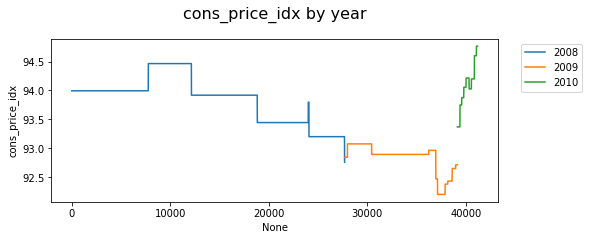

In [36]:
feature_name = 'cons_price_idx'

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=bank, x=bank.index, y=feature_name, hue='year', palette='tab10', ax=ax)

ax.set_title(f'{feature_name} by year', fontsize=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right');

2008 and 2009: index was gradually decreasing with some short periods of growth. And at the end of 2009 it started to grow.
2010: prices went up dramatically.

Now, let's see how YES-proportion correlates with cons.price.idx by month and year and throughout the entire dataset:


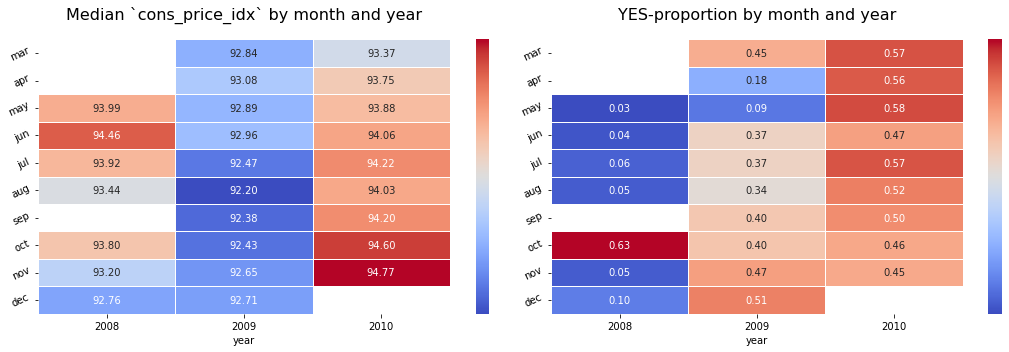

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_observations_by(by='month and year', df_=bank, feature_name=feature_name, 
                              fig=fig, ax=axes[0])
plot_yes_proportion_by(by='month and year', df_=bank, feature_name=feature_name, 
                                fig=fig, ax=axes[1])

plt.tight_layout()

In [38]:
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (cons_price_idx vs y): -0.1362


There is a little negative correlation between cons.price.idx and y

Let's check a distribution for YES/NO-answers:


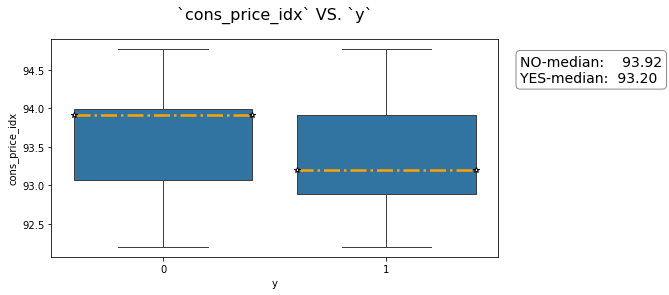

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=bank['y'], y=bank[feature_name],
            medianprops={'linestyle':'-.', 'linewidth':2.5, 'color':'orange',
                         'marker':'*', 'markerfacecolor':'white', 'markeredgecolor':'black'},
            ax=ax)

bbox_props = dict(boxstyle='round', fc='w', ec='0.5', alpha=0.9)
median_no, median_yes = bank.groupby('y')[feature_name].median()
plt.text(1.6, 94.5, f'NO-median: {median_no:>8.2f}\nYES-median: {median_yes:>6.2f}', 
         ha='left', va='center', size=14,
         bbox=bbox_props)

plt.title(f'`{feature_name}` VS. `y`', fontsize=16, pad=20);

Again, there is a huge difference between medians, and that's good for classification tasks.

## Conclusion: cons.price.idx

There is a little negative correlation (-0.14) between cons.price.idx and y.
There is a huge difference between medians of cons.price.idx for YES/NO-answers.
Values:
Number of unique values: 26
Vary from 92.201 to 94.767

## Feature: cons.conf.idx (numeric)
    
cons.conf.idx: consumer confidence index - monthly indicator (numeric)



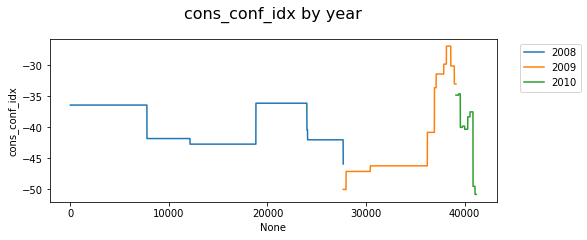

In [40]:
feature_name = 'cons_conf_idx'

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=bank, x=bank.index, y=feature_name, hue='year', palette='tab10', ax=ax)

ax.set_title(f'{feature_name} by year', fontsize=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right');

2008: a consumer confidence varied a lot and was decreasing at the end of the year.
2009: an index was increasing and became pretty high before the drop at the end.
2010: a consumer confidence went down fast and that fully correlate with a consumer price index for that time.
    
Now, let's see how YES-proportion correlates with cons.conf.idx by month and year and throughout the entire dataset:



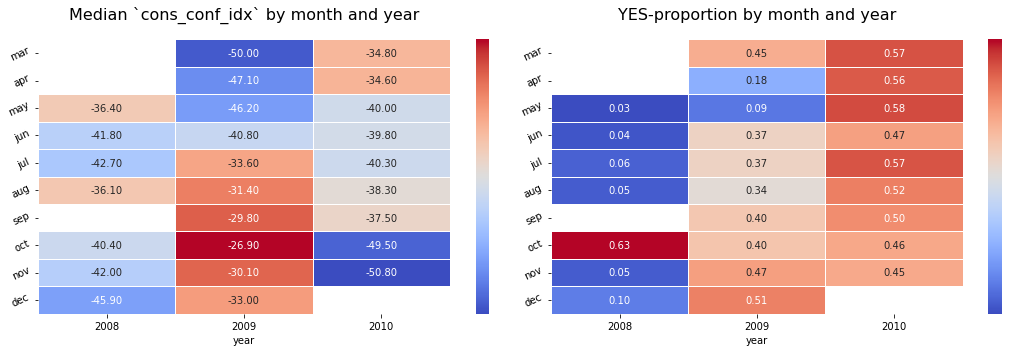

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_observations_by(by='month and year', df_=bank, feature_name=feature_name, 
                              fig=fig, ax=axes[0])
plot_yes_proportion_by(by='month and year', df_=bank, feature_name=feature_name, 
                                fig=fig, ax=axes[1])

plt.tight_layout()

In [42]:
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (cons_conf_idx vs y): 0.0549


There is no significant correlation between cons.conf.idx and y.

Let's check a distribution for YES/NO-answers:



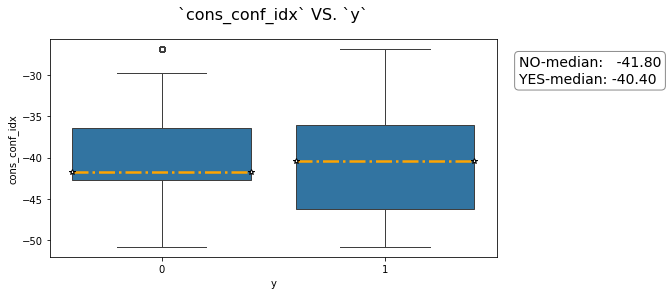

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=bank['y'], y=bank[feature_name],
            medianprops={'linestyle':'-.', 'linewidth':2.5, 'color':'orange',
                         'marker':'*', 'markerfacecolor':'white', 'markeredgecolor':'black'},
            ax=ax);

bbox_props = dict(boxstyle='round', fc='w', ec='0.5', alpha=0.9)
median_no, median_yes = bank.groupby('y')[feature_name].median()
plt.text(1.6, -29.5, f'NO-median: {median_no:>8.2f}\nYES-median: {median_yes:>6.2f}', 
         ha='left', va='center', size=14,
         bbox=bbox_props)

plt.title(f'`{feature_name}` VS. `y`', fontsize=16, pad=20);

## Conclusion: cons.conf.idx

There is no noticeable correlation between consumer confidence index and people's answers.
Median values of cons.conf.idx for YES/NO-answers are nearly equal.
Values:
Number of unique values: 26
Vary from -50.8 to -26.9

## Feature: euribor3m (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)
Euribor - The Euro Interbank Offered Rate is a daily reference rate, published by the European Money Markets Institute, based on the averaged interest rates at which Eurozone banks offer to lend unsecured funds to other banks in the euro wholesale money market. Prior to 2015, the rate was published by the European Banking Federation.


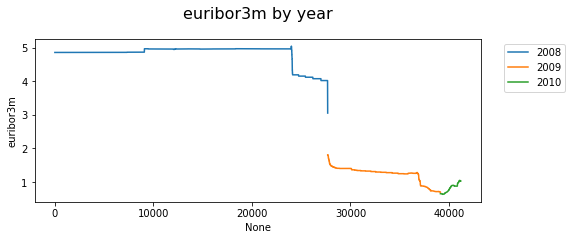

In [44]:
feature_name = 'euribor3m'

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=bank, x=bank.index, y=feature_name, hue='year', palette='tab10', ax=ax)

ax.set_title(f'{feature_name} by year', fontsize=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right');

2008: during that year a euribor3m was stable and dropped at the end.
2009: the euribor3m continued to gradually decrease, but much slowly than in the last months of 2008, and there was another drop at the end of the year.
2010: the euribor3m was growing.

Now, let's see how YES-proportion correlates with euribor3m by month and year and throughout the entire dataset:

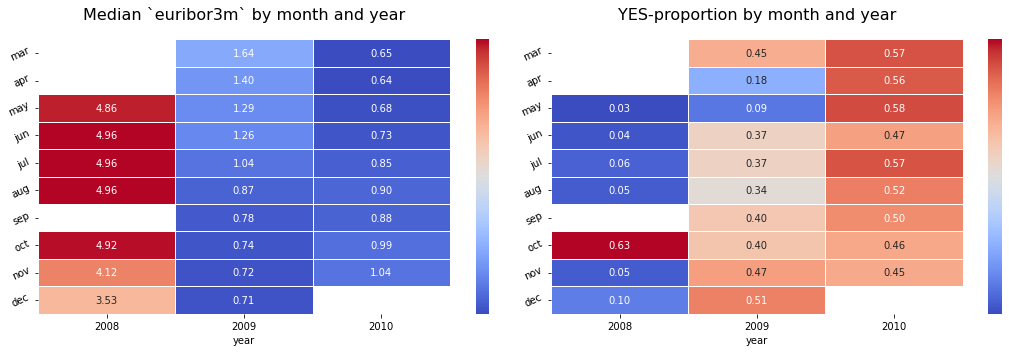

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_observations_by(by='month and year', df_=bank, feature_name=feature_name, 
                              fig=fig, ax=axes[0])
plot_yes_proportion_by(by='month and year', df_=bank, feature_name=feature_name, 
                                fig=fig, ax=axes[1])

plt.tight_layout()

In [46]:
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')


Pearson corr. coef. (euribor3m vs y): -0.3078


There is a weak negative correlation between euribor3m and y.

Let's check a distribution for YES/NO-answers:



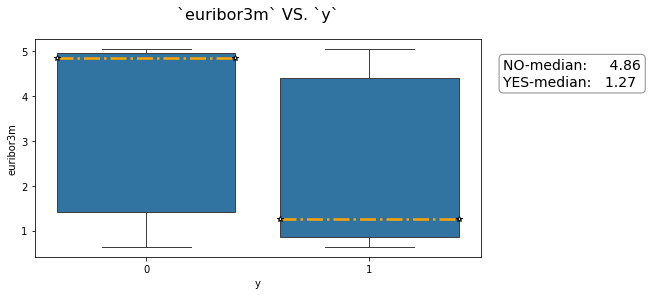

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=bank['y'], y=bank[feature_name],
            medianprops={'linestyle':'-.', 'linewidth':2.5, 'color':'orange',
                         'marker':'*', 'markerfacecolor':'white', 'markeredgecolor':'black'},
            ax=ax);

bbox_props = dict(boxstyle='round', fc='w', ec='0.5', alpha=0.9)
median_no, median_yes = bank.groupby('y')[feature_name].median()
plt.text(1.6, 4.5, f'NO-median: {median_no:>8.2f}\nYES-median: {median_yes:>6.2f}', 
         ha='left', va='center', size=14,
         bbox=bbox_props)

plt.title(f'`{feature_name}` VS. `y`', fontsize=16, pad=20);

There is a huge difference between medians, so this feature will be useful for classification.


## Conclusion: euribor3m

There is a small negative correlation (-0.31) between euribor3m and y.
There is a huge difference between medians of euribor3m for YES/NO-answers.
Values:
Number of unique values: 316
Vary from 0.634 to 5.045

## Feature: nr.employed (numeric)

nr.employed: number of employees - quarterly indicator (numeric)


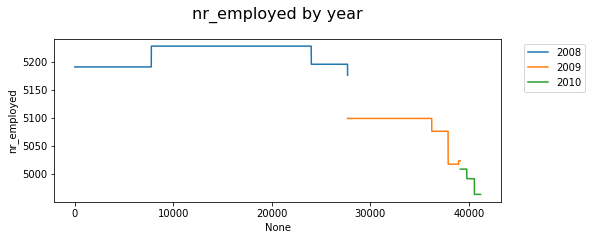

In [48]:
feature_name = 'nr_employed'

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=bank, x=bank.index, y=feature_name, hue='year', palette='tab10', ax=ax)

ax.set_title(f'{feature_name} by year', fontsize=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right');

2008: during that year a nr.employed was growing but dropped at the end.
2009: it was stable and there was another drop at the last months
2010: the nr.employed continued to fall down.
    
Now, let's see how YES-proportion correlates with nr.employed by month and year and throughout the entire dataset:


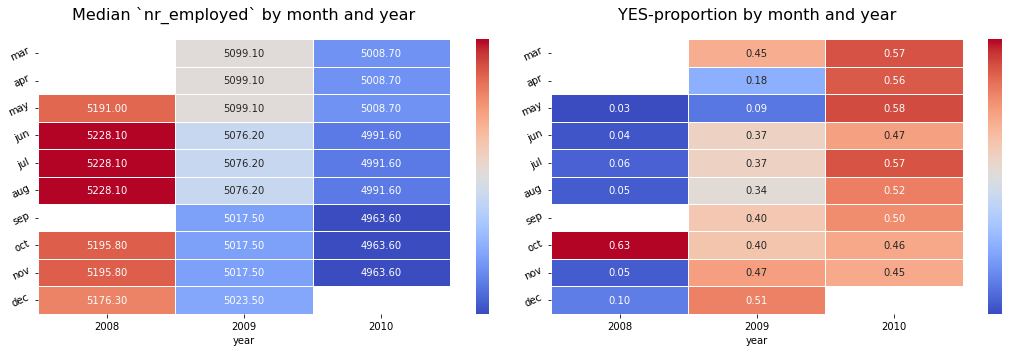

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_observations_by(by='month and year', df_=bank, feature_name=feature_name, 
                              fig=fig, ax=axes[0])
plot_yes_proportion_by(by='month and year', df_=bank, feature_name=feature_name, 
                                fig=fig, ax=axes[1])

plt.tight_layout()

In [50]:
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')


Pearson corr. coef. (nr_employed vs y): -0.3547


There is negative correlation between nr.employed and y.

Let's check a distribution for YES/NO-answers:

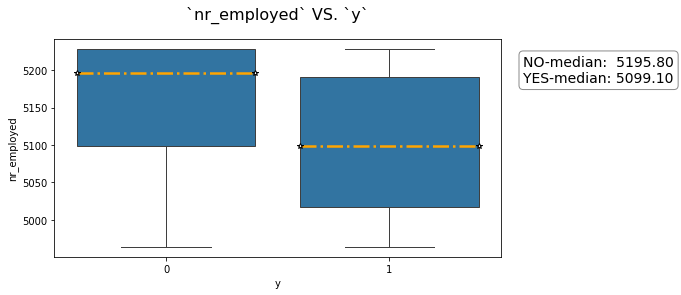

In [51]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x=bank['y'], y=bank[feature_name],
            medianprops={'linestyle':'-.', 'linewidth':2.5, 'color':'orange',
                         'marker':'*', 'markerfacecolor':'white', 'markeredgecolor':'black'},
            ax=ax)

bbox_props = dict(boxstyle='round', fc='w', ec='0.5', alpha=0.9)
median_no, median_yes = bank.groupby('y')[feature_name].median()
plt.text(1.6, 5200, f'NO-median: {median_no:>8.2f}\nYES-median: {median_yes:>6.2f}', 
         ha='left', va='center', size=14,
         bbox=bbox_props)

plt.title(f'`{feature_name}` VS. `y`', fontsize=16, pad=20);

We see the difference between medians, so this feature will be useful for classification.


## Conclusion: nr.employed

There is negative correlation (-0.36) between nr.employed and y.
There is a huge difference between medians of nr.employed for YES/NO-answers.
Values:
Number of unique values: 11
Vary from 4963.6 to 5228.1

## Output variable (target)
y: has the client subscribed a term deposit? (binary: 'yes','no')



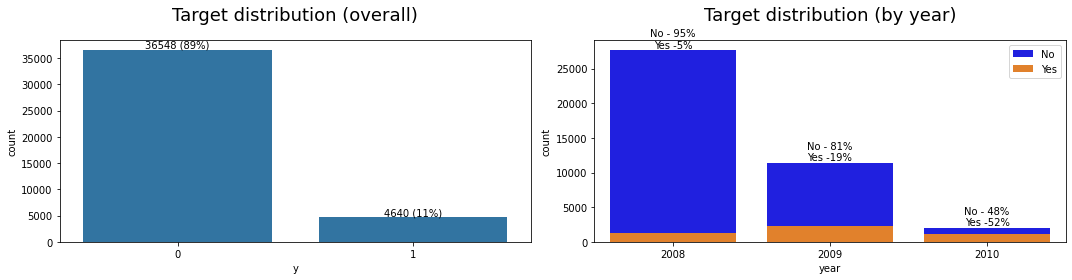

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot 1
sns.countplot(x=bank['y'], ax=axes[0])

abs_vals = bank['y'].value_counts()
rel_vals = bank['y'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]
axes[0].bar_label(container=axes[0].containers[0], labels=labels)

axes[0].set_title('Target distribution (overall)', fontsize=18, pad=20)

# Plot 2
sns.countplot(data=bank, x='year', label='No', color='b', ax=axes[1])
sns.countplot(data=bank[bank['y'] == 1], x='year', label='Yes', color=sns.color_palette()[1], ax=axes[1])

rel_vals_0 = bank.groupby('year')['y'].value_counts(normalize=True).sort_index().unstack()[0] * 100
rel_vals_1 = bank.groupby('year')['y'].value_counts(normalize=True).sort_index().unstack()[1] * 100
labels = [f'No - {p[0]:.0f}%\nYes -{p[1]:.0f}%' for p in zip(rel_vals_0, rel_vals_1)]
axes[1].bar_label(container=axes[1].containers[0], labels=labels)

axes[1].set_title('Target distribution (by year)', fontsize=18, pad=20)

axes[1].legend()

plt.tight_layout();

Highly imbalanced distribution overall

A share of YES-answers was growing by year

## Conclusion: Output variable (target)

Highly imbalanced distribution overall (89% of NO vs 11% of YES).

A share of YES-answer was growing by year.

2008 has the highest, but, at the same time, the slowest growth of the YES-proportion.

2010 has the lowest, but, at the same time, the fastest growth of the YES-proportion.

# Modeling I: Feature Engineering and Selection


In [53]:
bank['y'].replace({0: 'no', 1: 'yes'}, inplace=True);
# Find the numerical features
#----------------------------
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = bank.select_dtypes(include=numerics).columns.tolist()

# Find the categorical variables
#-------------------------------
objects = ['object','category', 'bool']
cat_features = bank.select_dtypes(include=objects).columns.tolist()

# Remove the target varible
cat_features.remove('y')

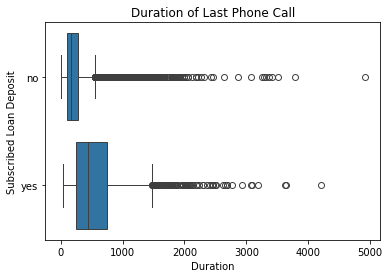

In [54]:
# duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 
# target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after 
# the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have 
# a realistic predictive model.
g = sns.boxplot(data=bank, x='duration', y='y',orient = 'h')

g.set_xlabel('Duration')
g.set_ylabel('Subscribed Loan Deposit')
g.set_title('Duration of Last Phone Call')

plt.show(g);

2.0.3


<Axes: >

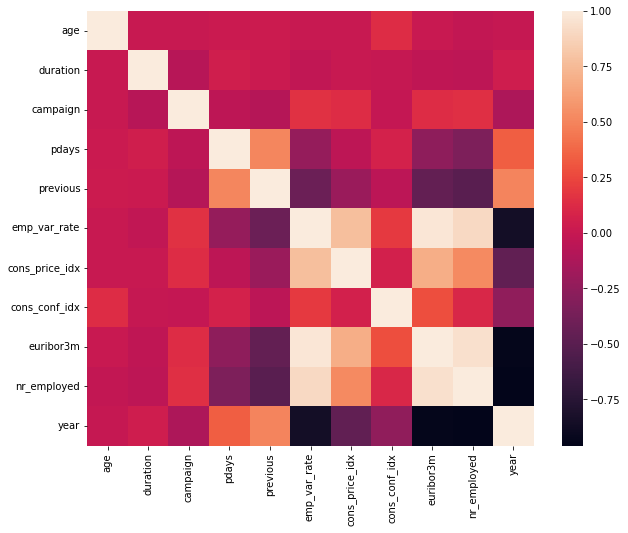

In [55]:
print(pd.__version__)
# Create a correlation matrix
corr_metrics = bank[num_features].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_metrics)
#plt.tight_layout();

The correlation between euribor3m and nr_employed is extremely high 94.51%

So is:

euribor3m - emp_var_rate: 97.2256
nr_employed - emp_var_rate: 90.60%
emp_var_rate - cons_price_idx: 77.53%
cons.price.idx: consumer price index - monthly indicator (numeric)
    
Which features to keep and which to disregard because of high correlation

    

In [56]:
# If the correlation between two features is extremely high we will discard one of the features. We want to avoid multicollinearity
columns = np.full((corr_metrics.shape[0],), True, dtype=bool)
for i in range(corr_metrics.shape[0]):
    for j in range(i+1, corr_metrics.shape[0]):
        if corr_metrics.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
                
numerical_selected_columns = corr_metrics.columns[columns]


<Axes: >

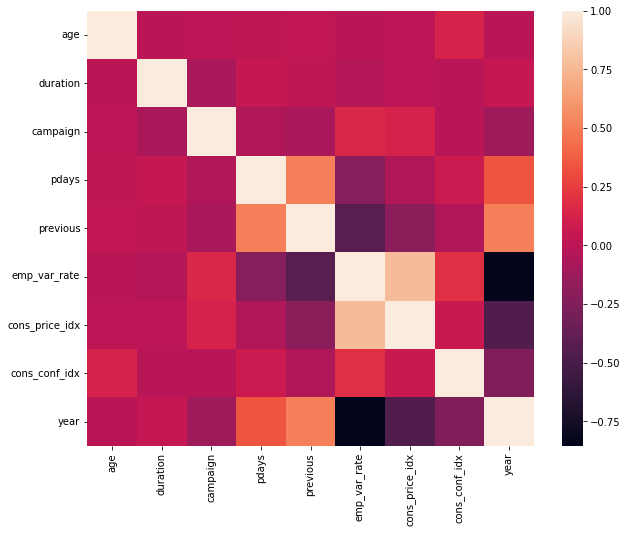

In [57]:

plt.figure(figsize=(10,8))
sns.heatmap(bank[numerical_selected_columns].corr(method='pearson'))

# Categorical Features Pre-Processing


In [68]:
# Create a Contigency table
#--------------------------
contingency_table = pd.crosstab(
    bank['y'],
    bank['job'],
    margins = True
)
contingency_table

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293,36548
yes,1352,638,124,106,328,434,149,323,275,730,144,37,4640
All,10422,9254,1456,1060,2924,1720,1421,3969,875,6743,1014,330,41188


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330

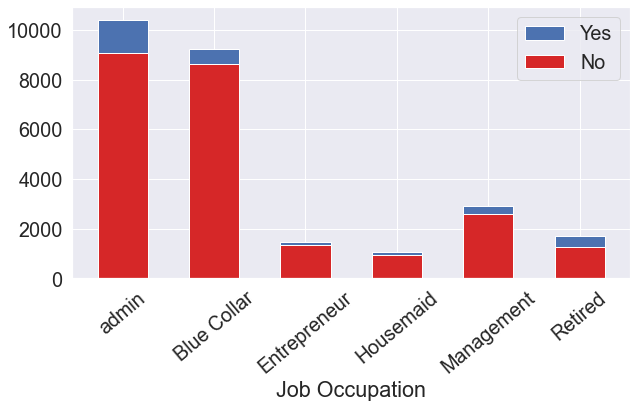

In [69]:
#Assigns the frequency values
#----------------------------
no_count = contingency_table.iloc[0][0:6].values
yes_count = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["admin","Blue Collar","Entrepreneur","Housemaid","Management","Retired"]
p1 = plt.bar(categories, no_count, 0.55, color='#d62728')
p2 = plt.bar(categories, yes_count, 0.55, bottom=no_count)
plt.legend((p2[0], p1[0]), ('Yes', 'No'))


plt.xlabel('Job Occupation')
plt.xticks(rotation=40)
#plt.ylabel('Count')
plt.show()

# Load Machine Learning Tools


In [70]:
# Machine Learning Imports
#--------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Preprocessing
#--------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Machine Learning Algorithms
#--------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier


# Model Selection
#------------------------------------
from sklearn.model_selection import GridSearchCV


# Metrics
#-------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


## Preprocess the Data
The next step is to set up a pipeline to preprocess the features. We will impute all missing values with a constant, and one-hot encode all categorical features.

In [73]:
# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

## Fit the Models and Evaluate Performance


In [74]:
# Create the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank["y"]

## Logistic Regression (Base Model)


In [75]:
# Import train_test_split function
#---------------------------------
from sklearn.model_selection import train_test_split

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8965768390386016

In [77]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

In [79]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix One way to do it is using pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,no,yes
Actual Label,,
no,7197,106
yes,746,189


In [78]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      7303
         yes       0.64      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



Given the precision is high for no but low for yes and the recall is also very high, we also know that we have an unbalanced dataset,we will stratify the dataset based on the target variable

## Unbalanced Dataset lets stratify the dataset train and test sit and fit the model again¶


In [80]:
# Creating a preprocessing and modelling pipepline (without taking into account)
#-------------------------------------------------------------------------------
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("clf", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)   # Added stratify since the  
                                                                                       #   dataset is unbalanced

# Train set class weights
pd.Series(y_train).value_counts(normalize=True)


y
no     0.887344
yes    0.112656
Name: proportion, dtype: float64

Notes:
We commonly use train_test_split function of Sklearn to divide the data and Sklearn provides handy argument - stratify to generate stratified splits

Setting stratify to the target (y) yielded identical distributions in both the train and test sets. Altered class weights are a serious problem that might make a model more biased towards a particular class. Forgetting to generate stratified splits might result in a more favorable train or test sets

When using cross-validation or pipelines, you don’t have to worry about this problem because CV splitters perform stratification under the hood using StratifiedKFold for classification problems.

In [82]:
# Fit and score the model
#------------------------
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

In [83]:
# confusion_matrix One way to do it is using pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,no,yes
Actual Label,,
no,7210,100
yes,724,204


In [84]:
# Classification Report
#----------------------

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7310
         yes       0.67      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



## The Dataset is an imbalanced Dataset with more No's then Yes's
Lets shuffle the dataset and resample to make sure they have the same number of each sample


In [85]:
# Subset only the No tracks, and then only the yes tracks
deposit_no = bank.loc[bank['y']=='no']
deposit_yes = bank.loc[bank['y']=='yes']

# sample the rocks songs to be the same number as there are hip-hop songs
deposit_no = deposit_no.sample(n = len(deposit_yes),random_state=10)


# concatenate the dataframes rock_only and hop_only
bank_sampled = pd.concat([deposit_no, deposit_yes])


features = num_features + cat_features
X_sample = bank_sampled[features]
y_sample = bank_sampled["y"]


In [86]:
X_sample.shape


(9280, 18)

In [87]:
# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("clf", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)


# Train set class weights
pd.Series(y_train).value_counts(normalize=True)

y
no     0.500135
yes    0.499865
Name: proportion, dtype: float64

In [88]:
# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

In [89]:
# confusion_matrix One way to do it is using pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,no,yes
Actual Label,,
no,776,151
yes,343,586


In [90]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.69      0.84      0.76       927
         yes       0.80      0.63      0.70       929

    accuracy                           0.73      1856
   macro avg       0.74      0.73      0.73      1856
weighted avg       0.74      0.73      0.73      1856



In [96]:
%run custom_functions.ipynb
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 73.38%
Precision: 0.80
Recall: 0.63
F1 score: 0.70


{'accuracy': 0.73, 'precision': 0.8, 'recall': 0.63, 'f1': 0.7}

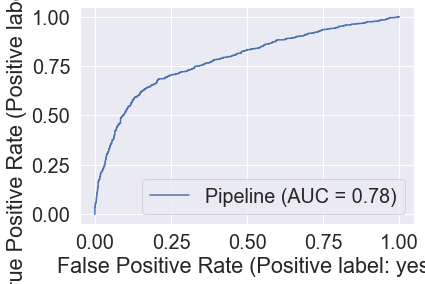

In [97]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
#plot_roc_curve(model, X_test, y_test)

In [98]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.3200709 , 0.81424045, 0.33528216, 0.17245007, 0.97912748,
        0.29746772, 0.28791966, 0.92087478, 0.34548462, 0.34323062]),
 1856)

In [99]:
%run custom_functions.ipynb
plot_roc_curve(fpr, tpr)

NameError: name 'plot_roc_curve' is not defined